# 👊 CHAPTER 13 CNN(Convolutional Neural Networks)

#### 🙋 Chapter Manager : 장승준  🙎 Contents Add :   남창헌             

## 👊 CNN(Convolutional Neural Networks)    
              
### &nbsp;&nbsp;𝐎 개념    

   - (과정) 고수준 뉴런이 이웃한 저수준 뉴런의 출력에 기반한다는 Idea를 시작으로 이러한 구조가 전체 시야 영역에 포함된 모든 종류의 복잡한 pattern을 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;감지하고 합성곱 신경망으로 점진적 진화

   - (구성요소) Fully-Connected Layer, Activation Function, Convolutional Layer, Pooling Layer 

## 👊 Convolutional Layer(합성곱층)
$\quad$ 𝐎 Convolutional(합성곱)  
$\qquad$ - 한 함수가 다른 함수 위를 이동하면서 원소별 곱셈의 적분을 계산하는 수학 연산   
$\qquad$ - 두 함수 중 하나를 반전시키는 것, 즉 이미지나 필터 중 하나는 뒤집어서 연산을 해야 함
   
$\quad$ 𝐎 Convolutional Layer(합성곱층)   
$\qquad$ - (과정)  

$\qquad \quad$1. 합성곱층의 뉴런은 입력 이미지의 모든 픽셀에 연결되는 것이 아니라 합성곱층 뉴런의 수용장 안에 있는 픽셀에만 연결됨  
$\qquad \quad$2. 합성곱층에 있는 각 뉴런은 첫 번째 층의 작은 사각 영역 안에 위치한 뉴런에 연결     
$\qquad \qquad$ => 네트워크가 첫 번째 은닉층에서는 저수준 특성에 집중하고, 그다음 은닉층에서는 고수준 특성으로 조합해 나가도록 도와줌   
$\qquad \qquad$ CNN이 이미지 인식에 잘 작동하는 이유 중 하나   
$\qquad$ - (Hyperparameter)  
$\qquad \quad$ 1. zero padding(제로 패딩)              
$\qquad \quad$ 2. stride(스트라이드)    

#### - 층과 zero padding 사이의 연결

In [1]:
from IPython.display import Image 
Image(filename = "Ch 13. zero padding.jpg",width = 600, height = 600)

  - 어떤 층의 $i$행, $j$열에 있는 한 뉴런은 이전 층의 $i$에서 $i + f_{h} - 1$까지의 행과 $j$에서 $j + f_{w} - 1$까지의 열에 있는 뉴런의 출력에 연결됨  
  ($f_{h}와 f_{w}$는 이 수용장(receptive field)의 높이와 너비)    
  - 높이와 너비를 이전 층과 같게 하기 위해 입력의 주위에 0을 추가하는 것이 일반적

#### - Stride를 사용해 차원 축소하기

In [2]:
from IPython.display import Image 
Image(filename = "Ch 13. stride.jpg",width = 600, height = 600)

  - 수용장(receptive field) 사이의 간격을 두어 큰 입력층을 훨씬 작은 층에 연결하는 것도 가능
  - 여기서 연속된 두 개의 수용장 사이의 거리를 stride라고 함 
  - zero padding이 적용된 5X7 입력층이 3X3 수용장과 stride 2를 사용하여 3X4층에 연결됨
  - 가로 세로 방향의 stride가 동일할 필요는 없음
  - 상위층의 $i$행, $j$열에 있는 뉴런이 이전 층의 $i$ x $s_{h}$에서 $i$ x $s_{h} + f_{h} - 1$까지의 행과 $j$ x $s_{w}$에서 $j$ x $s_{w} + f_{w} - 1$까지의 열에 위치한 뉴런과 연결됨     
    ($s_{h},  s_{w}$은 stride의 수직값과 수평값)

### - Filter( 필터 혹은 convolution kernel 합성곱 커널)  
#### $\qquad$ 1. 가중치 set

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

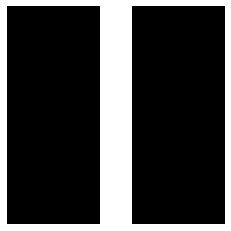

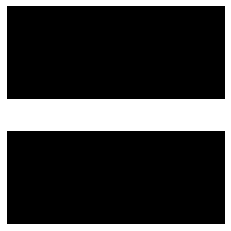

In [4]:
fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1
plot_image(fmap[:, :, 0, 0])
plt.show()
plot_image(fmap[:, :, 0, 1])
plt.show()

  - 이러한 수직 필터와 수평 필터는 검은색은 0, 흰색은 1로       
    수직 필터는 가운데 수직선 부분,           
    수평 필터는 가운데 수평선 부분을    
    제외하고는 수용장 안의 모든 것을 무시할 것 

In [5]:
import tensorflow as tf

In [6]:
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

# Create a graph with input X plus a convolutional layer applying the 2 filters
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

#### 원본

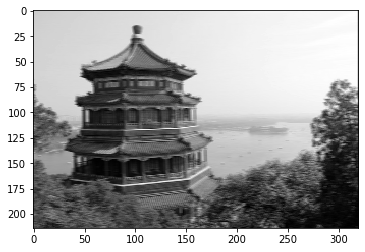

In [7]:
plt.imshow(output[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.show()

#### 수직 filter 적용

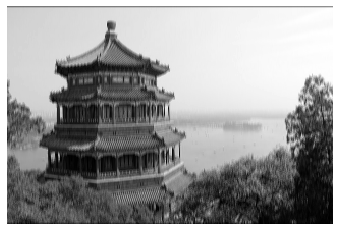

In [8]:
import os

plot_image(output[0, :, :, 0])

plt.show()

#### 수평 filter 적용

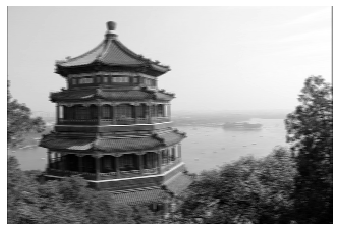

In [9]:
plot_image(output[0, :, :, 1])

plt.show()

## 𝐎 Convolutional Layer 정리
    
   - 합성곱이란? 한 함수가 다른 함수 위를 이동하면서 원소별 곱셈의 적분을 계산함  
     (푸리에 변환, 라플라스 변환과 깊은 관계가 있고 신호 처리 분야에서 많이 사용됨)    
           
         
   - CNN의 가장 중요한 구성요소로 첫 번째 합성곱층의 뉴런은 (ex)이미지 분류를 한다면) 입력 이미지의 모든 pixel에 연결되는 것이 아니라     
     합성곱층 뉴런의 receptive field(수용장) 안에 있는 pixel에만 연결됨    
         
             
   - 두 번째 합성곱층에 있는 각 뉴런은 첫 번쨰 층의 작은 사각 영역 안에 위치한 뉴런에 연결   
       
            
   - 이런 구조는 네트워크가 첫 번째 hidden layer에서는 저수준 특성에 집중하고, 그 다음은 hidden layer에서는 고수준 특성을 조합해 나가도록 도와줌      
        
             
   - 계층적 구조는 실제이미지 확인가능    
            
                
   - 합성곱층은 합성곱과 매우 유사한 교차 상관(cross-correlation)을 사용     
           
                
   - 보통 층이 깊어질수록 receptive field(수용장)의 넓이가 줄기에 이전 층과 같게 하기 위해 입력의 주위에 0을 추가하는 것이 일반적이고 이를 zero padding이라 함    
            
               
   - 연속된 두 개의 receptive field(수용장) 사이에 간격을 두어 큰 입력층을 훨씬 작은 층에 연결하는 것이 가능하고 연속된 두 개의receptive field(수용장) 사이의 거리를 stride(스트라이드)라고 함  

###  &#8251; 여러 개의 특성 map 쌓기
한 특성 맵에 있는 모든 뉴런이 같은 parameter를 공유한다는 사실은 model의 전체 parameter 수를 급격하게 줄여줌   
    
하지만 더욱 중요한 점은 CNN이 한 지점에서 pattern을 인식하도록 학습되었다면 다른 어느 위치에 있더라도 패턴을 인식할 수 있다는 것을 의미  
    
일반적인 DNN은 한 지점에 있는 pattern을 인식하도록 학습되었다면 오직 pattern이 그 위치에 있을 때만 감지할 수 있음

#### &#8251;  &nbsp; 합성곱층에 있는 뉴런 출력의 계산

$ z_{i,j,k} = b_{k} + \sum_{u = 0}^{f_{h} - 1} {\sum_{v = 0}^{f_{w} - 1} {\sum_{k' = 0}^{f_{n'} - 1} { x_{i',j',k'} \times w_{u,v,k',k}}}} $,    여기서 $ \begin{cases}
i' = i \times s_{h} + u \\
j' = j \times s_{w} + v 
\end{cases} $    
   
   
 - $z_{i,j,k}$는 convolution layer($l$layer)의 $k$특성 맵에서 $i$행, $j$열에 위치한 뉴런의 출력   
     
       
 - 앞서 설명한 것처럼 $s_{h}$와 $s_{w}$는 수직과 수평 stride이고 $f_{h}$와 $f_{h}$는 receptive field의 높이와 너비이고 $f_{n'}$는 이전 layer( $ l - 1 $층)에 있는 특성 맵의 수    
       
         
 - $x_{i', j', k'}$는 $l - 1$ layer의 $i'$행, $j'$열, $k'$ 특성 맵(혹은 $l - 1$ layer가 input layer이면 $k'$ 채널)에 있는 뉴런의 출력  
      
        
 - $b_{k}$는 ( $l$ layer에 있는) $k$ 특성 맵의 편향입니다. 이를 $k$ 특성 맵의 전체 밝기를 조정하는 다이얼로 생각할 수 있음    
      
         
 - $w_{u,v,k',k}$는 $l$ layer의 $k$ 특성 맵에 있는 모든 뉴런과 (뉴런의 receptive field에 연관된) $u$ 행, $v$ 열, 그리고 $k'$ 특성 맵에 위치한 입력 사이의 연결 가중치

In [10]:
## tf.nn.conv2d(X, filters, strides = [ , ... , ],  padding = "SAME")
# padding = "SAME" 이면 zero padding , padding = "VALID" 이면 padding 없음
# 실제로 CNN에서 훈련 알고리즘이 최선의 fiter를 자동을 탐색

## ex

X = tf.placeholder( shape = (None, height, width, channels), dtype = tf.float32)
conv = tf.layers.conv2d(X, filters = 2, kernel_size = 7, strides = [2,2],
                       padding = "SAME")

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.


### padding의 option

1. padding = "VALID"   
   : No Padding(== p = 0)

2. padding = "SAME"    
   : 방금같은 3x3 필터의 경우 p = 1 일 때 출력값과 입력값의 크기가 동일함

   결론적으로 입력과 같은 크기의 출력을 갖게하는 패딩값

   $(n+2p-f+1) = n   $        
   $ p = \frac {f-1} {2} $    
       
   거의 항상 필터는 홀수의 크기를 갖고 있기 때문에

   Padding은 정수값으로 떨어진다.

- hyperparameter       
    1) filter 수, filter 높이, filter 너비, stride, padding 종류  
    2) 정확한 hyperparameter를 찾으려면 교차 검증을 사용해야 하지만 시간이 많이 걸림.   

## VALID vs SAME padding

In [11]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

reset_graph()

filter_primes = np.array([2., 3., 5., 7., 11., 13.], dtype=np.float32)
x = tf.constant(np.arange(1, 13+1, dtype=np.float32).reshape([1, 1, 13, 1]))
filters = tf.constant(filter_primes.reshape(1, 6, 1, 1))

valid_conv = tf.nn.conv2d(x, filters, strides=[1, 1, 5, 1], padding='VALID')
same_conv = tf.nn.conv2d(x, filters, strides=[1, 1, 5, 1], padding='SAME')

with tf.Session() as sess:
    print("VALID:\n", valid_conv.eval())
    print("SAME:\n", same_conv.eval())

VALID:
 [[[[184.]
   [389.]]]]
SAME:
 [[[[143.]
   [348.]
   [204.]]]]


In [12]:
print("VALID:")
print(np.array([1,2,3,4,5,6]).T.dot(filter_primes))
print(np.array([6,7,8,9,10,11]).T.dot(filter_primes))
print("SAME:")
print(np.array([0,1,2,3,4,5]).T.dot(filter_primes))
print(np.array([5,6,7,8,9,10]).T.dot(filter_primes))
print(np.array([10,11,12,13,0,0]).T.dot(filter_primes))


VALID:
184.0
389.0
SAME:
143.0
348.0
204.0


## 👊 Pooling Layer(풀링층)   

 - 목적 : 계산량과 메모리 사용량, subsample(부표본, 즉, 축소본) 생성(overfitting을 줄여주는 parameter 수를 줄이기 위해 입력 image)   
    
       
 - 입력 image의 크기를 줄이면 image가 약간 이동해도 신경망이 영향을 덜 받음 (location invariance, 위치 불변성)  
   
      
 - pooling layer의 각 뉴런은 이전 층의 작은 사각 영역의 receptive field 안에 있는 뉴런의 출력과 연결 되어 있음   
    
       
 - 이전과 동일하게 크기, stride, padding 유형을 지정해야함   
     
        
 - pooling 뉴런은 가중치가 없음 (최대나 평균 같은 합산 함수를 사용해 입력값을 더하는 것이 전부)   
      
        
 - 널리 사용되는 pooling layer : max pooling layer

#### - Max Pooling Layer

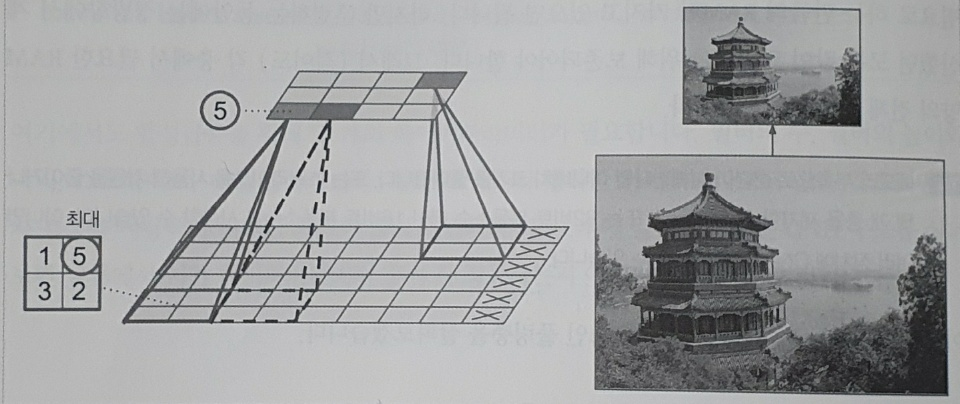

In [13]:
from IPython.display import Image
Image(filename = "Ch 13. max pooling layer.jpg", width = 600, height = 600)

### $\quad$ &#8251; receptive field와 kernel은 같은 것인가?
- receptive field에선 가중치를 반영해 적용시켜 합을 다음 층에 전달
- kernel은 규칙을 갖고 있어 해당 범위 내에 적용시켜 다음 층에 전달(ex. max pooling layer는 nm kernel에서 가장 큰 숫자만 다음층으로 전달)

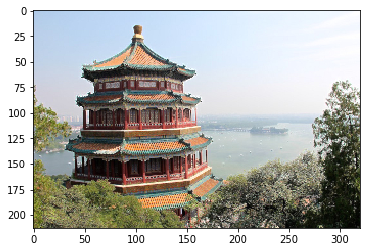

In [14]:
X = tf.placeholder(tf.float32, shape = (None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize = [1,2,2,1], strides = [1,2,2,1], padding = "VALID")

with tf.Session() as sess :
    output = sess.run( max_pool, feed_dict = {X : dataset})
    
plt.imshow( output[0].astype(np.int64)) # 첫 번째 image에 대한 출력을 그립니다.
plt.show()

 - ksize parameter에는 입력 tensor의 네 차원 [배치의 크기, 높이, 너비, 채널] 방향으로 커널의 크기를 지정.   
 - tensorflow는 현재 복수 개의 sample에 대한 pooling을 지원하지 않습니다.   
 - ksize의 첫 번째 원소는 반드시 1이어야 하고 공간 차원(높이와 너비)과 깊이 차원 양방향으로 풀링을 제공하지 않음.   
 - 그러므로 ksize[1]과 ksize[2]가 1이거나 ksize[3]이 1이어야 함   

&#8251; &nbsp; Average Pooling Layer(평균 풀링층)을 만들기 위해선 max_pool() 함수 대신 avg_pool() 함수를 사용하면 됨

- 미니배치의 크기를 줄이는 pooling은 할 수없음       
- 복수 개의 샘플에 대한 pooling을 하려면 tf.split()를 사용해 원하는 배치의 크기로 나누고 tf. reduce_max()를      
  사용해 분할된 배치에서 가장 큰 값을 추출한 다음이 값들을 다시 하나로 합쳐서 입력 tensor로사용 해야함

- 깊이 방향 풀링을 하려면 입력 tensor의 채널(혹은 특성맵) 수가 pooling 크기( ksize[3])로 나누어 떨어져야 하며,    
- 깊이 방향 strides의 크기(strides[3])가 풀링의 크기(ksize[3])와 같아야 함.

- tf.layers.conv2d() 함수에 상응하는 tf.layers.max_pooling2d(), tf.layers.average_pooling2d() 함수가 있음    
- 이 함수들에서도 strides = [2,2]와 같이 수직, 수평 strides만 전달  
- tf.layers 하위 함수에서는 padding option을 소문자로입력가능

## 👊 CNN 구조   
    
  - 전형적인 CNN 구조는 몇 개의 합성곱층을 쌓고(각각 ReLU 층을 그 뒤에 놓고), 그 후 pooling layer를 쌓고 그 다음에 또 몇 개의 convolution layer(+ ReLU)을 쌓고 다시 pooling layer를 쌓는 식   
     
        
  - 네트워크를 통과하여 진행할수록 이미지는 점점 작아지지만 convolution layer 떄문에 일반적으로 점점 더 깊어짐     
    (즉, 더 많은 특성 map을 가짐 아래 그림 참고)   
      
         
  - 맨 위층에는 몇 개의 완전연결층(+ ReLU)으로 구성된 일반적인 피드포워드 신경망(feedforward neural network)이 추가되고 마지막 층(ex. class 확률 추정을 위한 softmax layer)에서 예측을 출력     
  &#8251;  feedforward neural network는 순환 신경망처럼 뉴런의 출력이 순환되지않는 구조를 통칭하기 때문에 완전 연결 신경망과 합성곱 신경망을 포함    
&nbsp;&nbsp;&nbsp;&nbsp;but 보통 완전연결신경망만을 의미하는 것으로 경우가 많음     
     
         
  - 입력 -> convolution -> pooling -> convolution -> pooling -> 완전 연결    
&#8251; convolution layer에 너무 큰 커널을 사용하는 것은 흔히 하는 실수 
3x3 커널 두 개를 이어서 5x5 커널과 같은 효과를 낼 수 있으며     
&nbsp;&nbsp;&nbsp;&nbsp;parameter와 계산량이 훨씬 적음    
    
       
  - ILSBVRC 이미지넷 대회, image-net.org에서 우승을 차지한 model들을 살펴보는 것이 CNN을 이해하는데 도움이 됨

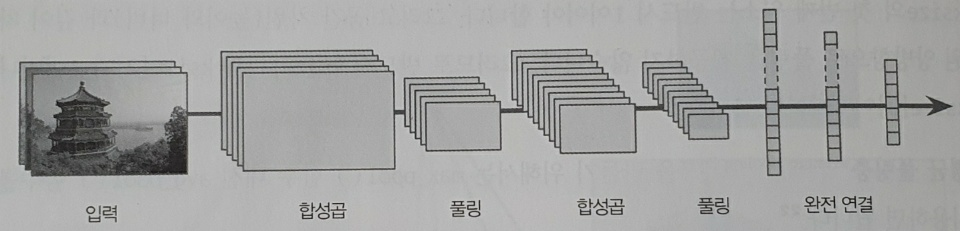

In [15]:
from IPython.display import Image
Image(filename = "Ch 13. CNN 구조.jpg", width = 600, height = 600)

#### 합성곱층에 너무 큰 kernel을 사용하는 것은 흔히 하는 실수   
##### 3 $\times$3 kernel 두개를 이어서 5$\times$5 kernel과 같은 효과를 낼 수 있으며 parameter와 계산량이 훨씬 적음

### 사용 가능 Image 예시

In [16]:
from sklearn.datasets import load_sample_image

In [17]:
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype = np.float32)

batch_size , height, width, channels= dataset.shape

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

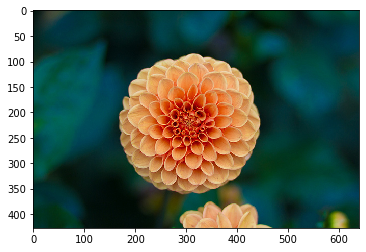

In [19]:
plt.imshow(flower)
plt.show()

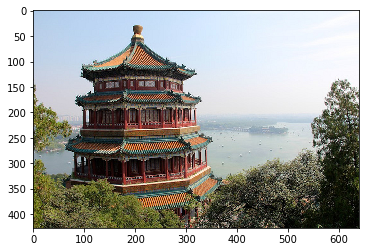

In [20]:
plt.imshow(china)
plt.show()

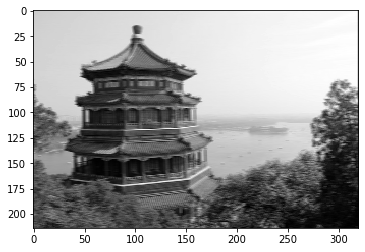

In [21]:
import numpy as np
from sklearn.datasets import load_sample_images

# Load sample images
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

# Create a graph with input X plus a convolutional layer applying the 2 filters
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

plt.imshow(output[0, :, :, 1], cmap="gray") # 첫 번째 image의 두 번째 특성 맵을 그림
plt.show()

## tf.nn.conv2d()에 대한 설명

- X는 입력의 미니배치(4D tensor)   
   
      
- filters는 적용될 일련의 filter(4D tensor)  
   
      
- strides는 4개의 원소를 가진 1D 배열. 가운데 두 개의 원소는 수직, 수평 스트라이드 ($S_{h}$ 와 $S_{w}$)이고,    
  현재는 첫 번째와 마지막 원소가 1이어야 함. 언젠가 배치 stride(즉, 일부 샘플을 건너뛰기 위해)와          
  채널 stride(이전 층의 특성 맵이난 채널을 건너뛰기 위해)를 지정하는데 사용될지도 모름    
      
          
- padding은 "VALID"와 "SAME" 중 하나를 지정    
     
        
- "VALID"로 지정하면 convolution layer에 zero padding을 사용하지 않음 ( 461p [그림 13-7]에 표현된 것처럼 
  stride에 따라 입력 image의 아래와 오른쪽 행과 열이 무시될 수 있음, 간단하게 표현하기 위해 여기서는 수평차원만 
  나타냈지만 같은 로직이 수직 차원에도 적용 )    
       
           
- "SAME"으로 지정하면 convolution layer에 zero padding을 사용함. 이 경우 출력 뉴런 수는 입력 뉴런 수를 stride로 나누어 올림
  한 것과 같음. (여기서는 ceil(13/5) = 3)/  그리고 입력 데이터 주변에 가능한한 동일하게 0이 추가됨.

- 실제 CNN에서 훈련 Algorithm이 최선의 filter를 자동으로 탐색을 함     
   
      
- tensorflow에선 filter 변수를 (kernel이란 이름으로) 만들고 랜덤하게 초기화해주는 tf.layers.conv2d() 함수가 있음     
    
       
- 편향 변수를 (bias란 이름으로) 만들고 0으로 초기화   
   
      
$\quad$ex 다음 코드는 입력 placeholder를 만들고 그 다음에 7x7 특성 맵으로 2x2 stride(이 함수엔 수직, 수평 stride만 지정)와     
$\qquad$"SAME" padding을 사용해 convolution layer를 만듦

- filter를 거치면    
     
  image의 한 변의 크기를 n, 필터의 한 변의 크기를 f라고 한다면,    
    
  출력 image의 크기는 $ (n-f+1) \times (n-f+1) $

### - padding의 필요성

   - 대게 행렬의 가장자리에 있는 픽셀들은 중간에 있는 픽셀보다 적은 횟수로 filter에 적용
      
         
   - 즉, 위 과정에서 데이터의 손실이 생기며 이미지가 축소 된다는 단점 발생   
        
            
   - padding을 사용하여 데이터 손실, 이미지축소의 두가지 단점을 모두 잡을 수 있다.    
     (padding해주는 값은 0으로 보통 채움)

### - filter와 padding 적용 총 결과
 - 내가 p를 padding의 양이라고 하면 이때 p = 1이다.

 - 이제 padding까지 추가하여 결과 image의 크기를 예상해보면, $ (n +2p -f +1) \times (n+2p-f+1)$ 이다.